In [1]:
import pandas as pd

In [11]:
df=pd.read_csv("Nigerian_Car_Prices.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4095 non-null   int64  
 1   Make                 4095 non-null   object 
 2   Year of manufacture  3617 non-null   float64
 3   Condition            3616 non-null   object 
 4   Mileage              4024 non-null   float64
 5   Engine Size          3584 non-null   float64
 6   Fuel                 3607 non-null   object 
 7   Transmission         4075 non-null   object 
 8   Price                4095 non-null   object 
 9   Build                1127 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 320.0+ KB


In [20]:
df.describe()

,Unnamed: 0,Year of manufacture,Mileage,Engine Size,Price
count,4095.000000,4095.000000,4.095000e+03,4095.000000,4.095000e+03
mean,2047.000000,2007.910379,1.821664e+05,3178.270085,4.271288e+06
std,1182.269005,4.041435,2.091046e+05,7201.910280,4.900064e+06
min,0.000000,1992.000000,1.000000e+00,3.000000,4.580000e+05
25%,1023.500000,2005.000000,1.025985e+05,2400.000000,1.872000e+06
50%,2047.000000,2008.000000,1.613525e+05,2500.000000,2.940000e+06
75%,3070.500000,2010.000000,2.306370e+05,3500.000000,4.725000e+06
max,4094.000000,2021.000000,9.976050e+06,371000.000000,5.880000e+07


In [14]:
df.head(5)

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
0,0,Toyota,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,"3,120,000",NaN
1,1,Lexus,NaN,NaN,138024.0,NaN,NaN,Automatic,"5,834,000",NaN
2,2,Mercedes-Benz,2008.0,Nigerian Used,376807.0,3000.0,Petrol,Automatic,"3,640,000",NaN
3,3,Lexus,NaN,NaN,213362.0,NaN,NaN,Automatic,"3,594,000",NaN
4,4,Mercedes-Benz,NaN,NaN,106199.0,NaN,NaN,Automatic,"8,410,000",NaN


In [15]:
# Remove commas from the price column
df['Price'] = df['Price'].str.replace(',', '')

#  convert price column to numeric data type
df['Price'] = pd.to_numeric(df['Price'])
df['Price']=df['Price'].astype(float)

In [17]:
df.isnull().sum()

Unnamed: 0                0
Make                      0
Year of manufacture     478
Condition               479
Mileage                  71
Engine Size             511
Fuel                    488
Transmission             20
Price                     0
Build                  2968
dtype: int64

In [19]:
# Calculate median for each column
median_year = df['Year of manufacture'].median()
median_mileage = df['Mileage'].median()
median_engine = df['Engine Size'].median()

# Fill NaN values with the median
df['Year of manufacture'].fillna(median_year, inplace=True)
df['Mileage'].fillna(median_mileage, inplace=True)
df['Engine Size'].fillna(median_engine, inplace=True)

df['Year of manufacture']=df['Year of manufacture'].astype(int)

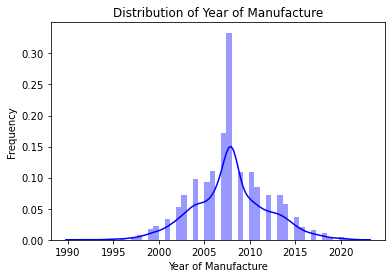

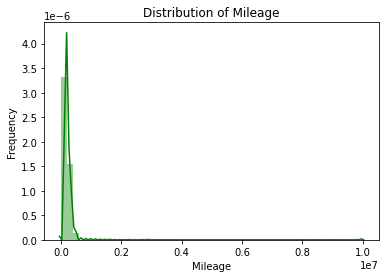

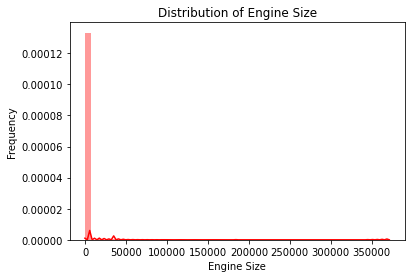

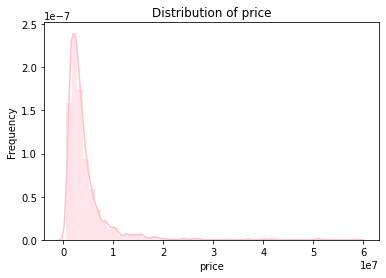

In [27]:
# checking the distribution of numerical variables: 
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of 'Year of manufacture'
sns.distplot(df['Year of manufacture'], kde=True, color='blue')
plt.title('Distribution of Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of 'Mileage'
sns.distplot(df['Mileage'], kde=True, color='green')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of 'Engine Size'
sns.distplot(df['Engine Size'], kde=True, color='red')
plt.title('Distribution of Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Frequency')
plt.show()
# plot distribution pf Price
sns.distplot(df['Price'], kde=True, color='pink')
plt.title('Distribution of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Calculate the 99th percentile of 'Mileage'
mileage_99th_percentile = df['Mileage'].quantile(0.99)

# Filter out rows where 'Mileage' is above the 99th percentile
df_filtered = df[df['Mileage'] <= mileage_99th_percentile]

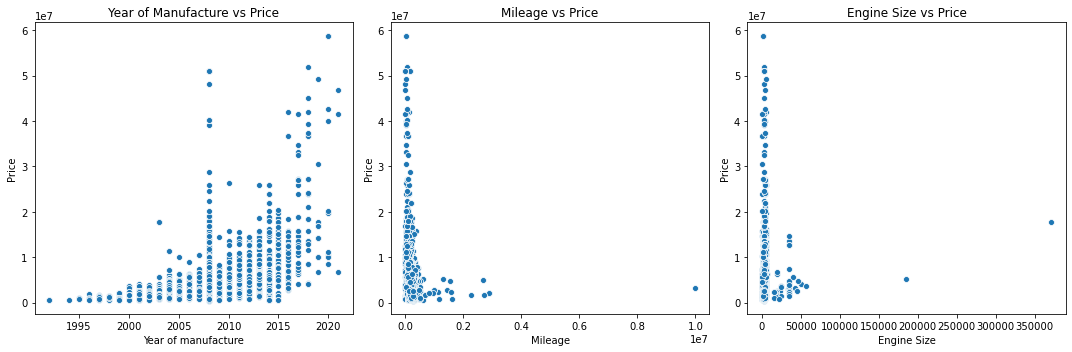

In [28]:
# Create scatter plots
plt.figure(figsize=(15, 5))

# Scatter plot for 'Year of manufacture' vs 'Price'
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Year of manufacture', y='Price')
plt.title('Year of Manufacture vs Price')

# Scatter plot for 'Mileage' vs 'Price'
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Mileage', y='Price')
plt.title('Mileage vs Price')

# Scatter plot for 'Engine Size' vs 'Price'
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Engine Size', y='Price')
plt.title('Engine Size vs Price')

plt.tight_layout()
plt.show()

In [30]:
import numpy as np
# Create a new column 'log_price' by taking the logarithm of 'Price'
df['log_price'] = np.log(df['Price'])


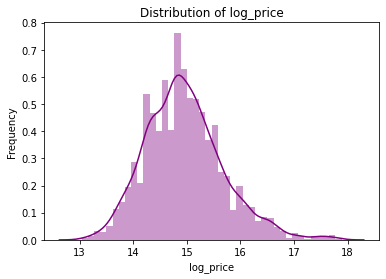

In [31]:
# plot distribution pf log_price
sns.distplot(df['log_price'], kde=True, color='purple')
plt.title('Distribution of log_price')
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.show()

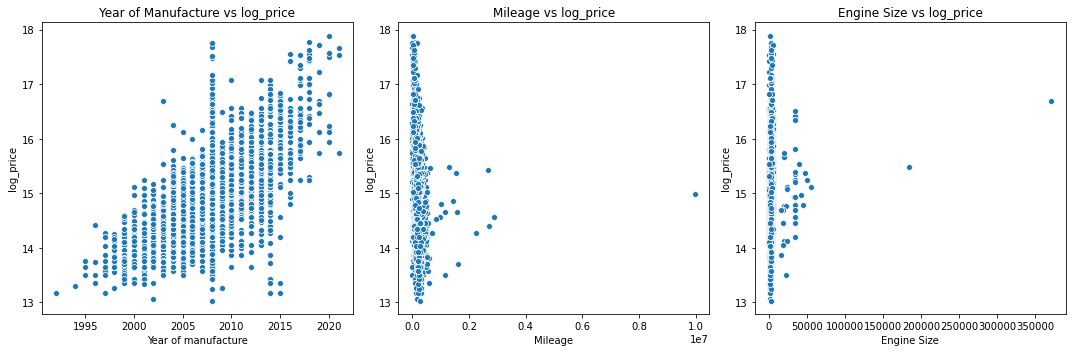

In [33]:
# Create scatter plots
plt.figure(figsize=(15, 5))

# Scatter plot for 'Year of manufacture' vs 'Price'
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Year of manufacture', y='log_price')
plt.title('Year of Manufacture vs log_price')

# Scatter plot for 'Mileage' vs 'Price'
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Mileage', y='log_price')
plt.title('Mileage vs log_price')

# Scatter plot for 'Engine Size' vs 'Price'
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Engine Size', y='log_price')
plt.title('Engine Size vs log_price')

plt.tight_layout()
plt.show()

In [21]:
# Define a list of  categorical columns 
columns_of_interest = [ 'Make','Condition','Fuel','Transmission','Build']
# Iterate through each column and print the number of categories and their counts
for column in columns_of_interest:
    # Ensure the column is treated as a categorical variable
    df[column] = df[column].astype('category')
    
    # Get the value counts
    category_counts = df[column].value_counts()
# Print the results
    print(f"Column: {column}")
    print("Number of categories:", len(category_counts))
    print("Category counts:")
    print(category_counts)
    print()

Column: Make
Number of categories: 49
Category counts:
Toyota           1469
Lexus             464
Mercedes-Benz     436
Honda             428
Ford              197
Hyundai           179
Nissan            173
Kia                90
Land Rover         74
Volkswagen         64
BMW                63
Mazda              63
Acura              56
Infiniti           41
Chevrolet          40
Peugeot            36
Mitsubishi         23
Volvo              22
Pontiac            22
Suzuki             21
Dodge              17
Audi               14
Opel               12
Jeep               11
Jaguar             11
Porsche             9
Renault             8
Chrysler            7
Fiat                6
GMC                 5
Changan             4
Lincoln             4
Skoda               3
Mini                2
MG                  2
Buick               2
Citroen             2
JAC                 2
Isuzu               2
Hummer              2
Saturn              1
Daihatsu            1
Seat                1

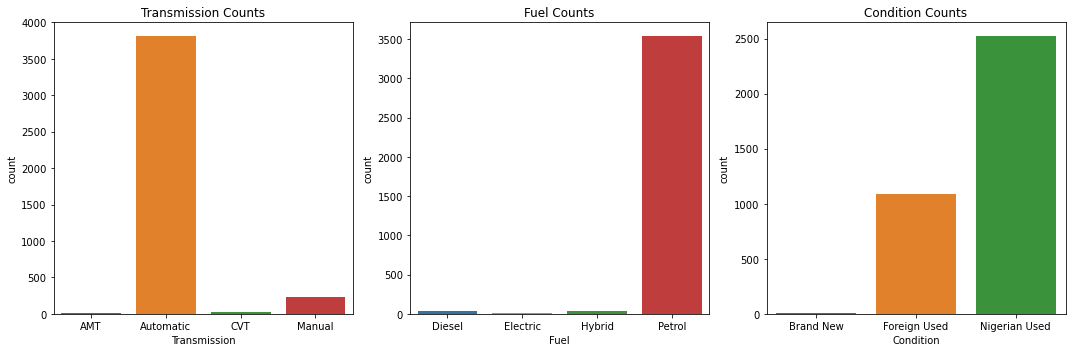

In [34]:
# Create count plots for each variable
plt.figure(figsize=(15, 5))

# Count plot for 'Transmission'
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Transmission')
plt.title('Transmission Counts')

# Count plot for 'Fuel'
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Fuel')
plt.title('Fuel Counts')

# Count plot for 'Condition'
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='Condition')
plt.title('Condition Counts')

plt.tight_layout()
plt.show()

In [35]:
# Fill NaN values for categorical variables with the most frequent class according to the count_plot
df['Transmission'].fillna('Automatic', inplace=True)
df['Fuel'].fillna('Petrol', inplace=True)
df['Condition'].fillna('Nigerian Used', inplace=True)

In [41]:
# Fill missing values in 'Build' column with 'other'
df['Build']= df['Build'].astype('str')
df['Build'].isnull().sum()



0

In [43]:
df['Build'].fillna('other', inplace=True)
df['Build']= df['Build'].astype('category')


In [44]:
# Drop 'Unnamed: 0' and 'Make' columns
df.drop(columns=['Unnamed: 0', 'Make'], inplace=True)
